In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import datetime as dt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime
import scipy.stats as st


In [2]:
plt.rcParams["figure.figsize"] = (15, 7.5)

In [3]:
covid_cases_df = pd.read_csv ('cases_daily_state.csv')
#convert Date to datetime format
covid_cases_df["Date"] = pd.to_datetime(covid_cases_df["Date"])
covid_cases_df.head()


,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2020-01-25,3,1,0.0,0.0,0.0,0,0.0,0.0
1,2020-01-26,0,0,0.0,0.0,0.0,0,0.0,0.0
2,2020-01-27,1,0,0.0,0.0,0.0,0,0.0,0.0
3,2020-01-28,0,0,0.0,0.0,0.0,0,0.0,0.0
4,2020-01-29,0,2,2.0,0.0,0.0,0,0.0,0.0


In [4]:
covid_cases_df.set_index('Date', inplace=True)
covid_cases_df.index = pd.to_datetime(covid_cases_df.index)
monthly_cases_df = covid_cases_df.resample('M').sum()
monthly_cases_df.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Date,,,,,,,,
2020-01-31,222,619,46.0,31.0,34.0,2,2.0,5.0
2020-02-29,185,933,71.0,25.0,14.0,3,6.0,4.0
2020-03-31,2094,1577,764.0,340.0,379.0,74,29.0,83.0
2020-04-30,328,797,103.0,26.0,51.0,79,0.0,7.0
2020-05-31,184,1079,30.0,11.0,68.0,7,2.0,3.0


In [5]:
monthly_cases_df
monthly_cases_df.reset_index()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2020-01-31,222,619,46.0,31.0,34.0,2,2.0,5.0
1,2020-02-29,185,933,71.0,25.0,14.0,3,6.0,4.0
2,2020-03-31,2094,1577,764.0,340.0,379.0,74,29.0,83.0
3,2020-04-30,328,797,103.0,26.0,51.0,79,0.0,7.0
4,2020-05-31,184,1079,30.0,11.0,68.0,7,2.0,3.0
5,2020-06-30,205,1195,24.0,9.0,22.0,3,1.0,0.0
6,2020-07-31,378,7963,33.0,16.0,33.0,13,1.0,2.0
7,2020-08-31,242,4385,49.0,12.0,32.0,9,2.0,5.0
8,2020-09-30,174,1080,27.0,6.0,47.0,7,1.0,2.0
9,2020-10-31,253,772,33.0,34.0,89.0,12,7.0,5.0


In [6]:
monthly_cases_df['Total'] = monthly_cases_df.sum(axis=1)
monthly_cases_df.reset_index()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total
0,2020-01-31,222,619,46.0,31.0,34.0,2,2.0,5.0,961.0
1,2020-02-29,185,933,71.0,25.0,14.0,3,6.0,4.0,1241.0
2,2020-03-31,2094,1577,764.0,340.0,379.0,74,29.0,83.0,5340.0
3,2020-04-30,328,797,103.0,26.0,51.0,79,0.0,7.0,1391.0
4,2020-05-31,184,1079,30.0,11.0,68.0,7,2.0,3.0,1384.0
5,2020-06-30,205,1195,24.0,9.0,22.0,3,1.0,0.0,1459.0
6,2020-07-31,378,7963,33.0,16.0,33.0,13,1.0,2.0,8439.0
7,2020-08-31,242,4385,49.0,12.0,32.0,9,2.0,5.0,4736.0
8,2020-09-30,174,1080,27.0,6.0,47.0,7,1.0,2.0,1344.0
9,2020-10-31,253,772,33.0,34.0,89.0,12,7.0,5.0,1205.0


In [7]:
monthly_cases_df['NSW %'] = (monthly_cases_df['NSW']/monthly_cases_df['Total'])*100
monthly_cases_df['VIC %'] = (monthly_cases_df['VIC']/monthly_cases_df['Total'])*100
monthly_cases_df['QLD %'] = (monthly_cases_df['QLD']/monthly_cases_df['Total'])*100
monthly_cases_df['SA %'] = (monthly_cases_df['SA']/monthly_cases_df['Total'])*100
monthly_cases_df['WA %'] = (monthly_cases_df['WA']/monthly_cases_df['Total'])*100
monthly_cases_df['TAS %'] = (monthly_cases_df['TAS']/monthly_cases_df['Total'])*100
monthly_cases_df['NT %'] = (monthly_cases_df['NT']/monthly_cases_df['Total'])*100
monthly_cases_df['ACT %'] = (monthly_cases_df['ACT']/monthly_cases_df['Total'])*100

monthly_cases_df.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total,NSW %,VIC %,QLD %,SA %,WA %,TAS %,NT %,ACT %
Date,,,,,,,,,,,,,,,,,
2020-01-31,222,619,46.0,31.0,34.0,2,2.0,5.0,961.0,23.100937,64.412071,4.786681,3.225806,3.537981,0.208117,0.208117,0.520291
2020-02-29,185,933,71.0,25.0,14.0,3,6.0,4.0,1241.0,14.907333,75.181305,5.721193,2.014504,1.128122,0.241741,0.483481,0.322321
2020-03-31,2094,1577,764.0,340.0,379.0,74,29.0,83.0,5340.0,39.213483,29.531835,14.307116,6.367041,7.097378,1.385768,0.543071,1.554307
2020-04-30,328,797,103.0,26.0,51.0,79,0.0,7.0,1391.0,23.580158,57.296909,7.404745,1.869159,3.666427,5.679367,0.000000,0.503235
2020-05-31,184,1079,30.0,11.0,68.0,7,2.0,3.0,1384.0,13.294798,77.962428,2.167630,0.794798,4.913295,0.505780,0.144509,0.216763


In [8]:
monthly_cases_df.describe()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total,NSW %,VIC %,QLD %,SA %,WA %,TAS %,NT %,ACT %
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,32081.555556,25275.305556,12450.638889,3105.805556,45.888889,924.305556,531.055556,1046.583333,7.546114e+04,34.023790,52.624479,7.348755,2.511418,1.255163,0.869044,0.452316,0.915037
std,97632.775301,62273.357428,46012.000221,9520.241647,74.007636,2857.870494,1833.862761,3442.318391,2.226610e+05,15.912616,20.382302,7.469841,2.173077,2.093127,1.078859,0.446934,0.514011
min,174.000000,619.000000,24.000000,6.000000,2.000000,0.000000,0.000000,0.000000,9.610000e+02,4.479204,22.970668,0.120617,0.043672,0.002007,0.000000,0.000000,0.000000
25%,347.500000,1481.500000,52.750000,25.750000,12.500000,1.000000,6.750000,5.000000,3.916750e+03,22.245357,32.766933,1.034215,0.515557,0.021008,0.013137,0.104261,0.481161
50%,4230.500000,5012.000000,89.000000,46.500000,31.000000,11.500000,15.000000,83.500000,9.232500e+03,39.040174,53.237201,3.877759,1.941832,0.155031,0.513307,0.269993,1.038988
75%,30920.250000,26376.000000,11319.500000,3791.500000,43.000000,1219.000000,406.000000,1046.000000,7.863175e+04,43.451037,64.152810,14.086144,4.576954,1.223062,1.462475,0.599146,1.286182
max,587388.000000,376470.000000,277724.000000,56914.000000,379.000000,17144.000000,11018.000000,20850.000000,1.347793e+06,74.965675,94.359521,22.638062,6.367041,7.385892,5.679367,1.695266,1.718127


In [9]:
percent_change_df = monthly_cases_df.diff()

percent_change_df['NSW % variance'] = (percent_change_df['NSW']/percent_change_df['Total'])*100
percent_change_df['VIC % variance'] = (percent_change_df['VIC']/percent_change_df['Total'])*100
percent_change_df['QLD % variance'] = (percent_change_df['QLD']/percent_change_df['Total'])*100
percent_change_df['SA % variance'] = (percent_change_df['SA']/percent_change_df['Total'])*100
percent_change_df['WA % variance'] = (percent_change_df['WA']/percent_change_df['Total'])*100
percent_change_df['TAS % variance'] = (percent_change_df['TAS']/percent_change_df['Total'])*100
percent_change_df['NT % variance'] = (percent_change_df['NT']/percent_change_df['Total'])*100
percent_change_df['ACT % variance'] = (percent_change_df['ACT']/percent_change_df['Total'])*100
percent_change_df['Total Cases']= monthly_cases_df['Total']
percent_change_df['Total % variance']= (percent_change_df.pct_change(fill_method='ffill')['Total Cases'])*100
percent_change_df.rename(columns = {'Total':'Difference in total',
                                   'NSW':'Difference NSW',
                                   'VIC':'Difference VIC',
                                   'QLD':'Difference QLD',
                                   'SA':'Difference SA',
                                   'WA':'Difference WA',
                                   'TAS':'Difference TAS',
                                   'NT':'Difference NT',
                                   'ACT': 'Difference ACT'
                                   }, inplace = True)
percent_change_df.reset_index()

del percent_change_df["NSW %"]
del percent_change_df["VIC %"]
del percent_change_df["QLD %"]
del percent_change_df["SA %"]
del percent_change_df["WA %"]
del percent_change_df["TAS %"]
del percent_change_df["NT %"]
del percent_change_df["ACT %"]

percent_change_df



,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
Date,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.0,NaN
2020-02-29,-37.0,314.0,25.0,-6.0,-20.0,1.0,4.0,-1.0,280.0,-13.214286,112.142857,8.928571,-2.142857,-7.142857,0.357143,1.428571,-0.357143,1241.0,29.136316
2020-03-31,1909.0,644.0,693.0,315.0,365.0,71.0,23.0,79.0,4099.0,46.572335,15.711149,16.906563,7.684801,8.904611,1.732130,0.561112,1.927299,5340.0,330.298147
2020-04-30,-1766.0,-780.0,-661.0,-314.0,-328.0,5.0,-29.0,-76.0,-3949.0,44.720182,19.751836,16.738415,7.951380,8.305900,-0.126614,0.734363,1.924538,1391.0,-73.951311
2020-05-31,-144.0,282.0,-73.0,-15.0,17.0,-72.0,2.0,-4.0,-7.0,2057.142857,-4028.571429,1042.857143,214.285714,-242.857143,1028.571429,-28.571429,57.142857,1384.0,-0.503235
2020-06-30,21.0,116.0,-6.0,-2.0,-46.0,-4.0,-1.0,-3.0,75.0,28.000000,154.666667,-8.000000,-2.666667,-61.333333,-5.333333,-1.333333,-4.000000,1459.0,5.419075
2020-07-31,173.0,6768.0,9.0,7.0,11.0,10.0,0.0,2.0,6980.0,2.478510,96.962751,0.128940,0.100287,0.157593,0.143266,0.000000,0.028653,8439.0,478.409870
2020-08-31,-136.0,-3578.0,16.0,-4.0,-1.0,-4.0,1.0,3.0,-3703.0,3.672698,96.624359,-0.432082,0.108021,0.027005,0.108021,-0.027005,-0.081015,4736.0,-43.879607
2020-09-30,-68.0,-3305.0,-22.0,-6.0,15.0,-2.0,-1.0,-3.0,-3392.0,2.004717,97.435142,0.648585,0.176887,-0.442217,0.058962,0.029481,0.088443,1344.0,-71.621622


In [10]:
percent_change_df=percent_change_df.reset_index()
percent_change_df.head()

,Date,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
0,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.0,NaN
1,2020-02-29,-37.0,314.0,25.0,-6.0,-20.0,1.0,4.0,-1.0,280.0,-13.214286,112.142857,8.928571,-2.142857,-7.142857,0.357143,1.428571,-0.357143,1241.0,29.136316
2,2020-03-31,1909.0,644.0,693.0,315.0,365.0,71.0,23.0,79.0,4099.0,46.572335,15.711149,16.906563,7.684801,8.904611,1.732130,0.561112,1.927299,5340.0,330.298147
3,2020-04-30,-1766.0,-780.0,-661.0,-314.0,-328.0,5.0,-29.0,-76.0,-3949.0,44.720182,19.751836,16.738415,7.951380,8.305900,-0.126614,0.734363,1.924538,1391.0,-73.951311
4,2020-05-31,-144.0,282.0,-73.0,-15.0,17.0,-72.0,2.0,-4.0,-7.0,2057.142857,-4028.571429,1042.857143,214.285714,-242.857143,1028.571429,-28.571429,57.142857,1384.0,-0.503235


In [11]:
percent_change_df = percent_change_df.drop(percent_change_df.index [ [ 0 ] ])
percent_change_df= percent_change_df.iloc[: -2, :]
percent_change_df.head()

,Date,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
1,2020-02-29,-37.0,314.0,25.0,-6.0,-20.0,1.0,4.0,-1.0,280.0,-13.214286,112.142857,8.928571,-2.142857,-7.142857,0.357143,1.428571,-0.357143,1241.0,29.136316
2,2020-03-31,1909.0,644.0,693.0,315.0,365.0,71.0,23.0,79.0,4099.0,46.572335,15.711149,16.906563,7.684801,8.904611,1.732130,0.561112,1.927299,5340.0,330.298147
3,2020-04-30,-1766.0,-780.0,-661.0,-314.0,-328.0,5.0,-29.0,-76.0,-3949.0,44.720182,19.751836,16.738415,7.951380,8.305900,-0.126614,0.734363,1.924538,1391.0,-73.951311
4,2020-05-31,-144.0,282.0,-73.0,-15.0,17.0,-72.0,2.0,-4.0,-7.0,2057.142857,-4028.571429,1042.857143,214.285714,-242.857143,1028.571429,-28.571429,57.142857,1384.0,-0.503235
5,2020-06-30,21.0,116.0,-6.0,-2.0,-46.0,-4.0,-1.0,-3.0,75.0,28.000000,154.666667,-8.000000,-2.666667,-61.333333,-5.333333,-1.333333,-4.000000,1459.0,5.419075


In [12]:
percent_change_df.describe()

,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.000000
mean,608.212121,1036.030303,288.939394,121.000000,-0.939394,36.848485,12.181818,28.272727,2.130545e+03,92.437181,-61.670106,36.109895,8.425519,-9.185181,31.432402,0.027209,2.423080,7.639709e+04,71.991437
std,131551.628994,86231.221898,66376.848992,12615.413484,108.724117,4090.355594,2575.079143,4851.688490,3.075363e+05,356.643743,715.478583,182.131897,38.078641,44.017421,179.013305,7.107508,10.084516,2.324203e+05,182.972333
min,-557303.000000,-354745.000000,-264507.000000,-52893.000000,-328.000000,-16074.000000,-9790.000000,-19795.000000,-1.275356e+06,-158.563669,-4028.571429,-41.670228,-20.143885,-242.857143,-5.333333,-28.571429,-4.000000,1.010000e+03,-94.625510
25%,-193.000000,-780.000000,-25.000000,-9.000000,-18.000000,-2.000000,-7.000000,-12.000000,-3.392000e+03,11.743275,15.711149,-3.144654,-0.249839,-0.442217,-0.006072,-0.267169,-0.357143,4.736000e+03,-11.108331
50%,79.000000,145.000000,4.000000,8.000000,1.000000,0.000000,2.000000,-1.000000,2.420000e+02,34.419703,56.534041,0.070734,0.283286,0.011173,0.102564,0.035367,0.537057,8.439000e+03,3.488540
75%,2347.000000,3197.000000,25.000000,114.000000,15.000000,10.000000,6.000000,55.000000,5.655000e+03,55.882353,87.546299,8.928571,5.705706,0.071608,1.260354,0.735294,1.613672,7.443500e+04,38.614683
max,482494.000000,331206.000000,265968.000000,46790.000000,365.000000,16595.000000,10747.000000,18928.000000,1.172977e+06,2057.142857,258.008449,1042.857143,214.285714,21.600000,1028.571429,18.000000,57.142857,1.347793e+06,670.978057


In [13]:
##Covid state count
monthly_cases_df
Cutted_monthly_cases_df = monthly_cases_df.iloc[3: , :]

y1_covid=Cutted_monthly_cases_df["NSW"]
y2_covid=Cutted_monthly_cases_df["VIC"]
y3_covid=Cutted_monthly_cases_df["QLD"]
y4_covid=Cutted_monthly_cases_df["WA"]
y5_covid=Cutted_monthly_cases_df["TAS"]
y6_covid=Cutted_monthly_cases_df["NT"]
y7_covid=Cutted_monthly_cases_df["ACT"]
y8_covid=Cutted_monthly_cases_df["Total"]


plt.plot_date(dates,y1_covid,'r',label="NSW")
plt.plot_date(dates,y2_covid,'b',label="VIC")
plt.plot_date(dates,y3_covid,'y',label="QLD")
plt.plot_date(dates,y4_covid,'g',label="WA")
plt.plot_date(dates,y5_covid,'m',label="TAS")
plt.plot_date(dates,y6_covid,'k',label="NT")
plt.plot_date(dates,y7_covid,'#ED0DD9',label="ACT")
#plt.plot_date(dates,y8_covid,'#FAC205',label="Total")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Dates')
plt.ylabel('Covid 19 Cases accross Australia')

plt.show()

NameError: name 'dates' is not defined

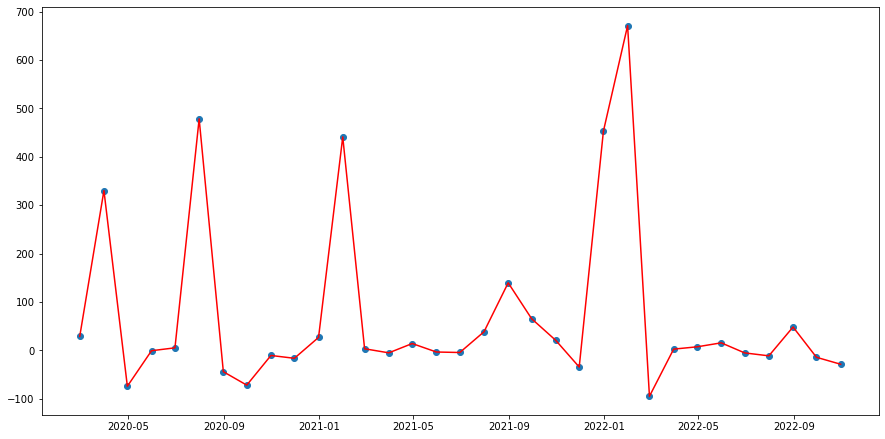

In [14]:
##COVID 19 percentage case variance

dates =percent_change_df[["Date"]]
Total_COVID_variance_percentage = percent_change_df["Total % variance"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

plt.plot_date(dates ,Total_COVID_variance_percentage, fmt='o', tz=None, xdate=True, ydate=False, data=None)
plt.plot_date(dates ,Total_COVID_variance_percentage, 'r')


plt.show()

In [15]:
Cleaned_state_turnover_perc_change = pd.read_csv("output_data/renamed_state.csv")
Cleaned_industry_turnover_perc_change = pd.read_csv("output_data/renamed_industry.csv")

In [16]:
Cleaned_state_turnover_perc_change = Cleaned_state_turnover_perc_change.iloc[3: , :]
Cleaned_state_turnover_perc_change.head()

,Date,% Change NSW,% Change VIC,% Change QLD,% Change SA,% Change WA,% Change TAS,% Change NT,% Change ACT,% Change Total,% Change NSW Seasonal,% Change VIC Seasonal,% Change QLD Seasonal,% Change SA Seasonal,% Change WA Seasonal,% Change TAS Seasonal,% Change NT Seasonal,% Change ACT Seasonal,% Change Total Seasonal
3,2020-02-01 00:00:00,-7.9,-6.0,-8.1,-6.9,-5.4,-6.9,-1.8,-1.3,-6.9,-0.1,0.8,1.1,0.5,1.4,-0.1,-0.4,1.5,0.6
4,2020-03-01 00:00:00,14.0,14.3,14.9,17.0,15.6,13.8,18.8,15.0,14.7,7.7,7.1,8.6,9.1,9.8,8.8,11.2,9.0,8.1
5,2020-04-01 00:00:00,-18.9,-22.3,-16.9,-16.5,-17.9,-20.2,-6.8,-17.3,-19.0,-17.4,-20.7,-15.4,-14.4,-16.4,-17.3,-7.3,-14.7,-17.4
6,2020-05-01 00:00:00,19.6,18.6,19.1,19.1,21.9,18.5,14.7,16.1,19.3,16.4,16.8,16.4,16.1,19.2,17.3,7.6,12.3,16.6
7,2020-06-01 00:00:00,2.1,2.6,0.5,-1.4,0.4,1.4,-1.3,1.0,1.4,3.4,4.2,0.7,1.0,2.7,3.5,-4.2,3.7,2.7


In [17]:
Cleaned_industry_turnover_perc_change
Cleaned_industry_turnover_perc_change = Cleaned_industry_turnover_perc_change.iloc[3: , :]
Cleaned_industry_turnover_perc_change.head()

,Date,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
3,2020-02-01 00:00:00,-4.4,-7.6,-17.7,-16.7,-4.2,-6.9,-6.9,0.7,0.8,-2.8,4.3,0.6,0.7,0.6
4,2020-03-01 00:00:00,29.3,12.8,-15.5,5.2,21.1,-17.0,14.7,23.7,8.2,-22.3,-8.7,16.3,-22.9,8.1
5,2020-04-01 00:00:00,-18.6,-4.6,-51.5,-5.2,-17.1,-36.6,-19.0,-17.1,0.8,-54.0,-15.2,-13.8,-35.4,-17.4
6,2020-05-01 00:00:00,7.3,23.7,147.3,44.2,13.3,31.0,19.3,7.0,16.3,131.4,43.8,8.6,30.5,16.6
7,2020-06-01 00:00:00,-4.5,2.7,18.1,-8.2,0.3,24.5,1.4,0.9,-3.7,20.8,-10.7,0.1,28.0,2.7


In [18]:
Cleaned_state_turnover_perc_change.describe()

,% Change NSW,% Change VIC,% Change QLD,% Change SA,% Change WA,% Change TAS,% Change NT,% Change ACT,% Change Total,% Change NSW Seasonal,% Change VIC Seasonal,% Change QLD Seasonal,% Change SA Seasonal,% Change WA Seasonal,% Change TAS Seasonal,% Change NT Seasonal,% Change ACT Seasonal,% Change Total Seasonal
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.347826,2.673913,2.286957,2.104348,2.621739,2.069565,2.034783,2.695652,2.360870,0.800000,0.991304,0.873913,0.586957,1.060870,0.686957,0.773913,1.108696,0.813043
std,11.301644,13.487544,10.738516,10.692754,11.318808,10.565486,8.772043,13.257330,11.019971,6.805279,9.570025,5.422698,5.403307,6.141938,5.910876,3.768918,9.100495,6.182476
min,-22.700000,-23.700000,-21.700000,-22.000000,-20.900000,-20.200000,-18.700000,-21.900000,-22.400000,-17.400000,-20.700000,-15.400000,-14.400000,-16.400000,-17.300000,-7.300000,-19.900000,-17.400000
25%,-3.400000,-4.250000,-2.600000,-2.400000,-1.750000,-3.050000,-3.050000,-2.200000,-3.100000,-2.100000,-3.000000,-0.900000,-1.150000,-0.800000,-1.550000,-1.150000,-1.000000,-1.750000
50%,3.800000,1.300000,3.600000,1.200000,2.000000,2.600000,-0.300000,2.700000,1.900000,0.500000,0.800000,0.300000,0.200000,1.200000,0.600000,0.800000,0.900000,0.600000
75%,10.600000,13.800000,7.100000,6.000000,7.100000,7.000000,9.500000,11.050000,10.350000,2.850000,3.850000,1.350000,0.950000,2.250000,2.600000,2.250000,2.900000,3.050000
max,19.600000,26.000000,19.600000,21.400000,21.900000,18.600000,18.800000,29.300000,19.300000,16.400000,22.000000,16.400000,16.100000,19.200000,17.300000,11.200000,20.200000,16.600000


In [19]:
Cleaned_industry_turnover_perc_change

,Date,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
3,2020-02-01 00:00:00,-4.4,-7.6,-17.7,-16.7,-4.2,-6.9,-6.9,0.7,0.8,-2.8,4.3,0.6,0.7,0.6
4,2020-03-01 00:00:00,29.3,12.8,-15.5,5.2,21.1,-17.0,14.7,23.7,8.2,-22.3,-8.7,16.3,-22.9,8.1
5,2020-04-01 00:00:00,-18.6,-4.6,-51.5,-5.2,-17.1,-36.6,-19.0,-17.1,0.8,-54.0,-15.2,-13.8,-35.4,-17.4
6,2020-05-01 00:00:00,7.3,23.7,147.3,44.2,13.3,31.0,19.3,7.0,16.3,131.4,43.8,8.6,30.5,16.6
7,2020-06-01 00:00:00,-4.5,2.7,18.1,-8.2,0.3,24.5,1.4,0.9,-3.7,20.8,-10.7,0.1,28.0,2.7
8,2020-07-01 00:00:00,6.2,0.1,2.4,-1.9,7.9,11.1,5.0,1.5,5.0,5.9,2.7,4.9,4.8,3.4
9,2020-08-01 00:00:00,0.6,-7.4,-14.5,-19.1,-5.9,-6.6,-4.8,-0.3,-6.6,-10.6,-8.5,-5.1,-6.3,-4.1
10,2020-09-01 00:00:00,-3.1,-1.2,1.3,10.0,-0.8,3.5,-0.8,-1.3,-3.5,-1.3,0.9,-1.0,3.2,-1.1
11,2020-10-01 00:00:00,5.3,5.6,14.4,14.9,7.0,8.2,7.0,0.0,-0.3,7.0,5.2,1.9,4.7,1.5
12,2020-11-01 00:00:00,-2.0,17.2,32.3,32.5,15.9,5.2,9.2,-0.5,11.5,25.6,19.4,7.8,6.6,6.7


In [20]:
Cleaned_industry_turnover_perc_change.describe()

,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1.704348,2.700000,8.808696,6.013043,3.160870,1.773913,2.360870,0.730435,1.173913,4.813043,0.952174,1.221739,1.147826,0.813043
std,10.564971,10.643948,39.577506,25.076199,11.497025,14.583372,11.019971,6.524251,6.266521,33.502541,15.073000,5.709717,13.719921,6.182476
min,-18.600000,-22.900000,-51.500000,-49.700000,-27.600000,-36.600000,-22.400000,-17.100000,-9.200000,-54.000000,-21.300000,-13.800000,-35.400000,-17.400000
25%,-4.200000,-5.350000,-15.900000,-12.000000,-2.750000,-6.800000,-3.100000,-0.950000,-2.250000,-10.050000,-9.450000,-0.700000,-3.350000,-1.750000
50%,0.600000,4.700000,3.900000,0.300000,3.400000,3.500000,1.900000,0.700000,-0.100000,0.000000,-0.700000,0.800000,2.300000,0.600000
75%,6.750000,8.850000,25.150000,31.300000,12.650000,9.800000,10.350000,1.500000,4.400000,6.450000,4.750000,2.150000,4.900000,3.050000
max,29.300000,23.700000,147.300000,45.500000,21.100000,31.000000,19.300000,23.700000,16.300000,131.400000,43.800000,16.300000,30.500000,16.600000


ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

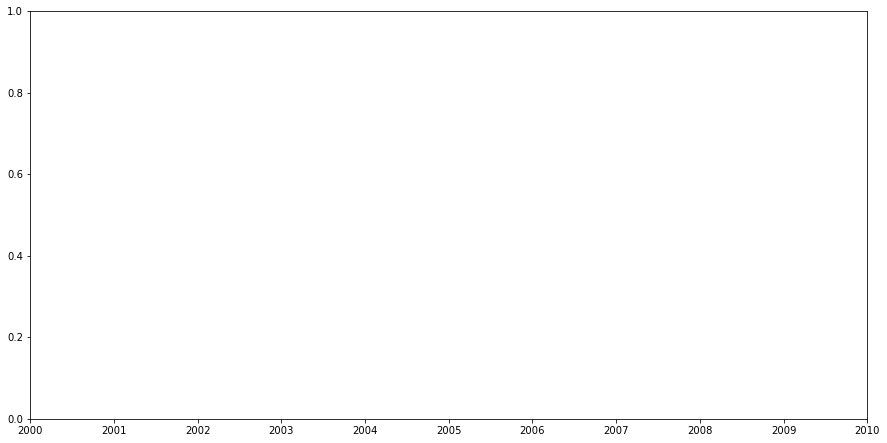

In [21]:
#industry_turnover_perc_change Graph

y1=Cleaned_industry_turnover_perc_change["% change Food Retailing Seasonal"]
y2=Cleaned_industry_turnover_perc_change["% change Household Goods Retailing Seasonal"]
y3=Cleaned_industry_turnover_perc_change["% change Clothing, Footwear and Personal Accessory Retailing Seasonal"]
y4=Cleaned_industry_turnover_perc_change["% change Other Retailing Seasonal"]
y5=Cleaned_industry_turnover_perc_change["% change Cafes, Restaurants and Takeaway Seasonal"]
y6=Cleaned_industry_turnover_perc_change["% change Total Industry Seasonal"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')


plt.plot_date(dates,y1,'r',label="% change Food Retailing Seasonal")
plt.plot_date(dates,y2,'b',label="% change Household Goods Retailing Seasonal")
plt.plot_date(dates,y3,'y',label="% change Clothing, Footwear and Personal Accessory Retailing Seasonal")
plt.plot_date(dates,y4,'g',label="% change Other Retailing Seasonal")
plt.plot_date(dates,y5,'m',label="% change Cafes, Restaurants and Takeaway Seasonal")
plt.plot_date(dates,y6,'k',label="% change Total Industry Seasonal")



plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Dates')
plt.ylabel('% Change')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

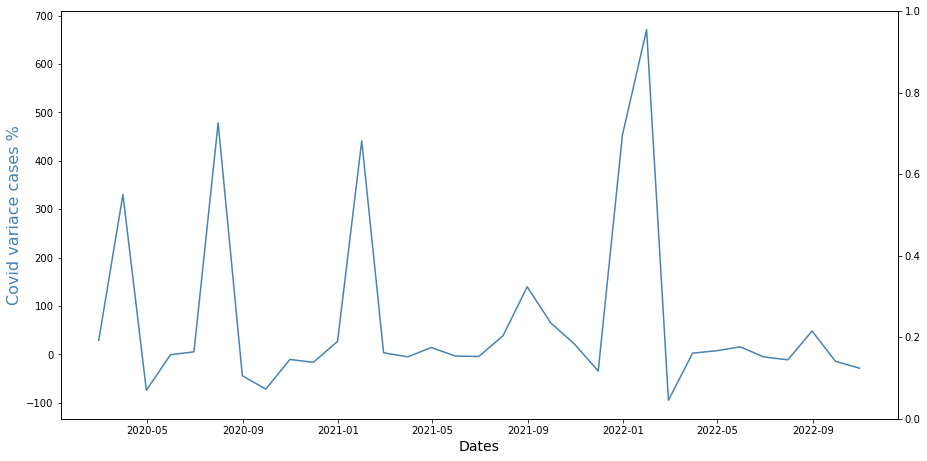

In [22]:
#Negative impact if any on the industry
#define colors to use
col1 = 'steelblue'
col2 = 'red'
y=Cleaned_industry_turnover_perc_change["% change Total Industry Seasonal"]
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(dates, Total_COVID_variance_percentage, color=col1)

#add x-axis label
ax.set_xlabel('Dates', fontsize=14)

#add y-axis label
ax.set_ylabel('Covid variace cases %', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(dates, y, color=col2)

#add second y-axis label
ax2.set_ylabel('% change Total Industry Seasonal', color=col2, fontsize=16)

ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

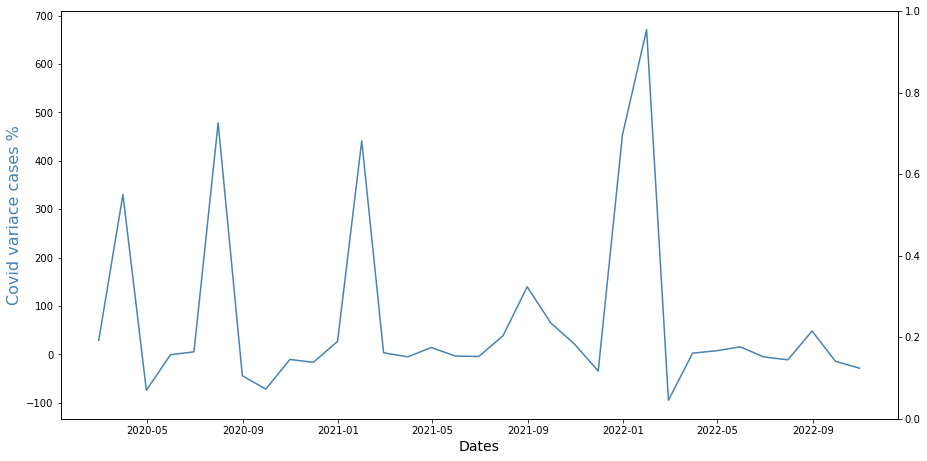

In [23]:
#Negative impact if any on Cafes, Restaurants and Takeaway
#define colors to use
col1 = 'steelblue'
col2 = 'red'
y=Cleaned_industry_turnover_perc_change["% change Cafes, Restaurants and Takeaway"]
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(dates, Total_COVID_variance_percentage, color=col1)

#add x-axis label
ax.set_xlabel('Dates', fontsize=14)

#add y-axis label
ax.set_ylabel('Covid variace cases %', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(dates, y, color=col2)

#add second y-axis label
ax2.set_ylabel('% Change Cafes, Restaurants and Takeaway', color=col2, fontsize=16)

ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

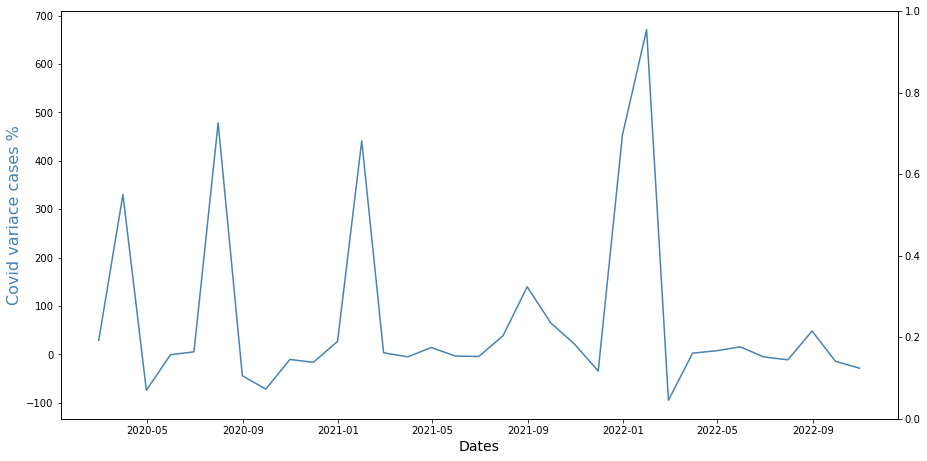

In [24]:
#Negative impact if any on Clothing, Footwear and Personal Accessory Retailing
#define colors to use
col1 = 'steelblue'
col2 = 'red'
y=Cleaned_industry_turnover_perc_change["% change Clothing, Footwear and Personal Accessory Retailing Seasonal"]
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(dates, Total_COVID_variance_percentage, color=col1)

#add x-axis label
ax.set_xlabel('Dates', fontsize=14)

#add y-axis label
ax.set_ylabel('Covid variace cases %', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(dates, y, color=col2)

#add second y-axis label
ax2.set_ylabel('% change Clothing, Footwear and Personal Accessory Retailing Seasonal', color=col2, fontsize=16)

ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

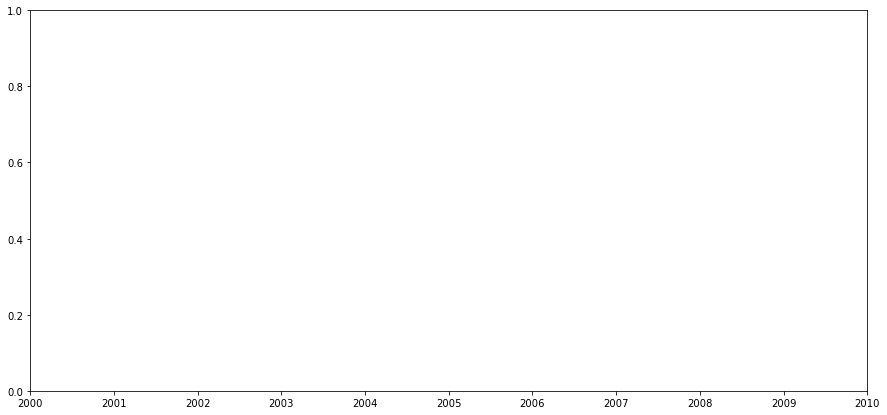

In [25]:
#State_turnover impact seasonal adjusted

y1=Cleaned_state_turnover_perc_change["% Change NSW Seasonal"]
y2=Cleaned_state_turnover_perc_change["% Change VIC Seasonal"]
y3=Cleaned_state_turnover_perc_change["% Change QLD Seasonal"]
y4=Cleaned_state_turnover_perc_change["% Change WA Seasonal"]
y5=Cleaned_state_turnover_perc_change["% Change TAS Seasonal"]
y6=Cleaned_state_turnover_perc_change["% Change NT Seasonal"]
y7=Cleaned_state_turnover_perc_change["% Change ACT Seasonal"]
y8=Cleaned_state_turnover_perc_change["% Change Total Seasonal"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.figure(figsize=(15, 7))

plt.plot_date(dates,y1,'r',label="% Change NSW Seasonal")
plt.plot_date(dates,y2,'b',label="% Change VIC Seasonal")
plt.plot_date(dates,y3,'y',label="% Change QLD Seasonal")
plt.plot_date(dates,y4,'g',label="% Change WA Seasonal")
plt.plot_date(dates,y5,'m',label="% Change TAS Seasonal")
plt.plot_date(dates,y6,'k',label="% Change NT Seasonal")
plt.plot_date(dates,y7,'#ED0DD9',label="% Change ACT Seasonal")
plt.plot_date(dates,y8,'#FAC205',label="% Change Total Seasonal")


# Add a legend with title, position it on the lower right (loc) with no box framing (frameon)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Dates')
plt.ylabel('% Change')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

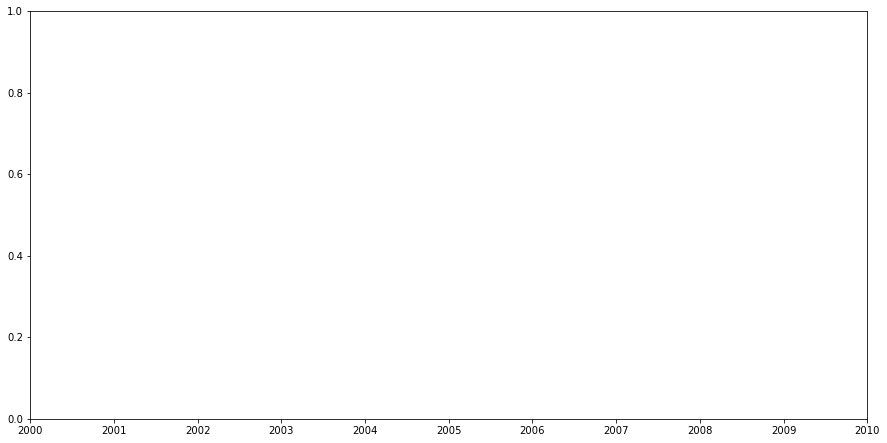

In [26]:
#State_turnover impact seasonal adjusted

plt.plot_date(dates,y2,'b',label="% Change VIC Seasonal")
plt.plot_date(dates,y4,'g',label="% Change WA Seasonal")
plt.plot_date(dates,y1,'r',label="% Change NSW Seasonal")
plt.plot_date(dates,y8,'#FAC205',label="% Change Total Seasonal")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Dates')
plt.ylabel('% Change')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (33, 1) and (23,)

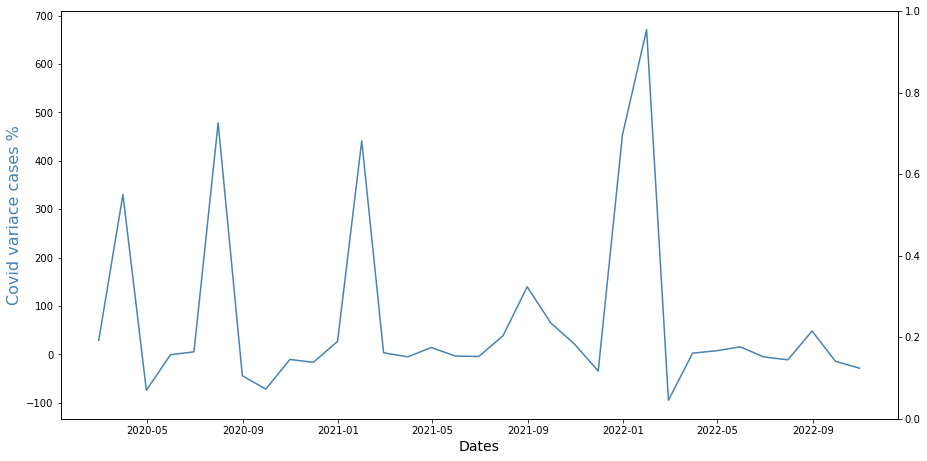

In [27]:
#Negative on NSW
#define colors to use
col1 = 'steelblue'
col2 = 'red'
#y_vic=Cleaned_state_turnover_perc_change["% Change VIC Seasonal"]
y_NSW=Cleaned_state_turnover_perc_change["% Change NSW Seasonal"]
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(dates, Total_COVID_variance_percentage, color=col1)

#add x-axis label
ax.set_xlabel('Dates', fontsize=14)

#add y-axis label
ax.set_ylabel('Covid variace cases %', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
#ax2.plot(dates, y_vic, color=col2)
ax2.plot(dates, y_NSW, color=col2)
#add second y-axis label
#ax2.set_ylabel('% Change VIC Seasonal', color=col2, fontsize=16)
ax2.set_ylabel('% Change NSW Seasonal', color=col2, fontsize=16)

In [28]:
renamed_state_df = pd.read_csv("output_data/renamed_state.csv")
renamed_state_df.head()


,Date,% Change NSW,% Change VIC,% Change QLD,% Change SA,% Change WA,% Change TAS,% Change NT,% Change ACT,% Change Total,% Change NSW Seasonal,% Change VIC Seasonal,% Change QLD Seasonal,% Change SA Seasonal,% Change WA Seasonal,% Change TAS Seasonal,% Change NT Seasonal,% Change ACT Seasonal,% Change Total Seasonal
0,2019-11-01 00:00:00,5.5,5.6,4.0,4.4,3.8,4.6,-2.0,6.0,4.9,1.1,1.0,1.1,1.3,0.3,0.2,-0.3,0.0,0.9
1,2019-12-01 00:00:00,18.4,21.5,18.6,17.1,19.1,23.1,7.4,17.1,19.2,-1.0,0.0,-0.6,-1.5,-0.1,1.4,-0.9,-0.2,-0.5
2,2020-01-01 00:00:00,-22.6,-24.0,-20.0,-21.2,-22.4,-20.9,-18.9,-25.2,-22.4,-0.4,-0.5,-0.1,0.0,-1.5,-0.9,-0.6,-2.6,-0.5
3,2020-02-01 00:00:00,-7.9,-6.0,-8.1,-6.9,-5.4,-6.9,-1.8,-1.3,-6.9,-0.1,0.8,1.1,0.5,1.4,-0.1,-0.4,1.5,0.6
4,2020-03-01 00:00:00,14.0,14.3,14.9,17.0,15.6,13.8,18.8,15.0,14.7,7.7,7.1,8.6,9.1,9.8,8.8,11.2,9.0,8.1


In [29]:
renamed_industry_df = pd.read_csv("output_data/renamed_industry.csv")
renamed_industry_df.head()

,Date,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
0,2019-11-01 00:00:00,0.7,7.9,13.0,18.2,8.3,0.6,4.9,0.4,1.1,3.5,3.9,-0.7,1.3,0.9
1,2019-12-01 00:00:00,14.2,16.5,44.5,54.4,17.7,7.9,19.2,0.0,-0.6,-2.1,-3.3,0.3,-0.9,-0.5
2,2020-01-01 00:00:00,-12.9,-24.3,-39.9,-49.7,-27.0,-11.4,-22.4,0.1,-1.2,-1.3,-3.3,-0.4,0.0,-0.5
3,2020-02-01 00:00:00,-4.4,-7.6,-17.7,-16.7,-4.2,-6.9,-6.9,0.7,0.8,-2.8,4.3,0.6,0.7,0.6
4,2020-03-01 00:00:00,29.3,12.8,-15.5,5.2,21.1,-17.0,14.7,23.7,8.2,-22.3,-8.7,16.3,-22.9,8.1


In [30]:
#setting date as ordinal value in order to achieve linear regression later

renamed_state_df['date_ordinal'] = pd.to_datetime(renamed_state_df['Date']).apply(lambda date: date.toordinal())
renamed_state_df['date_ordinal']= renamed_state_df['date_ordinal'].astype(float)
renamed_state_df ['% Change VIC Seasonal'] =  renamed_state_df ['% Change VIC Seasonal'].astype(float)
strDates = ['11/19','12/19','1/20','2/20','3/20','4/20','5/20','6/20','7/20','8/20','9/20','10/20','11/20','12/20','1/21','2/21','3/21','4/21','5/21','6/21','7/21','8/21','9/21','10/21','11/21','12/21']


LinregressResult(slope=0.0018405980188191517, intercept=-1356.9948404563404, rvalue=0.04769945734329402, pvalue=0.8170118249776394, stderr=0.007867654253748987, intercept_stderr=5804.318628931745)
 
The correlation of percentage change in Victoria of all industries (seasonally adjusted) over time is 0.05


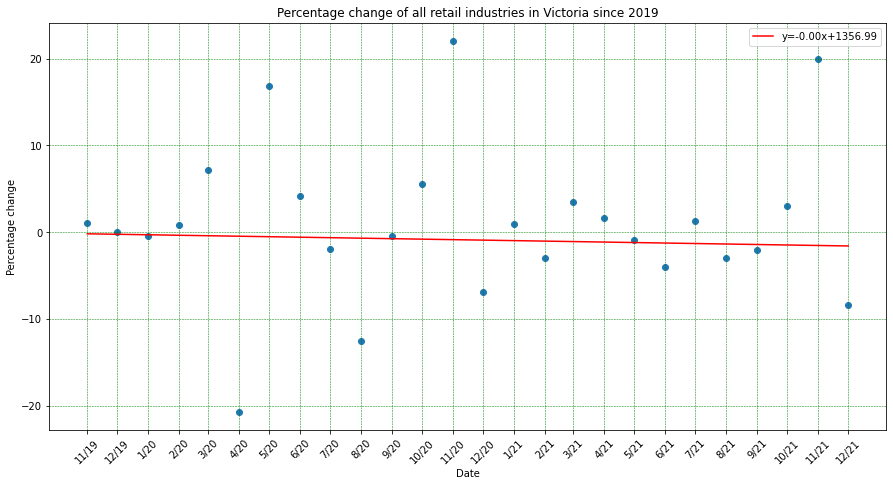

In [31]:
x_axis = renamed_state_df['date_ordinal']
y_axis = renamed_state_df ['% Change VIC Seasonal']
linereg = st.linregress(x_axis ,y_axis)
print(linereg)
print(" ")
corr = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation of percentage change in Victoria of all industries (seasonally adjusted) over time is {corr}")

slope = -0.0018405980188191517
intercept=1356.9948404563404

line = slope * (renamed_state_df ['date_ordinal']) + intercept

plt.scatter(x_axis, y_axis)
plt.plot(renamed_state_df ['date_ordinal'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel ('Date')
plt.ylabel ('Percentage change')
plt.legend()
plt.xticks(x_axis,strDates,rotation = 45)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Percentage change of all retail industries in Victoria since 2019')
plt.savefig('figVIC.png')
plt.show()

LinregressResult(slope=-0.0018609756324609599, intercept=1373.8129274445703, rvalue=-0.07485388721292276, pvalue=0.7162908536529909, stderr=0.005060583406362482, intercept_stderr=3733.4175589650604)
 
The correlation of percentage change in Western Australia of all industries (seasonally adjusted) over time is -0.07


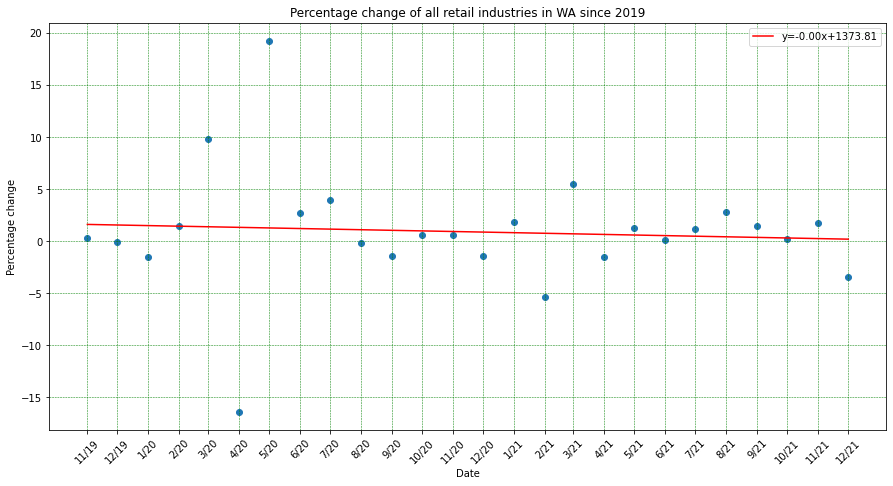

In [32]:
renamed_state_df ['% Change WA Seasonal'] =  renamed_state_df ['% Change WA Seasonal'].astype(float)

y_axis = renamed_state_df ['% Change WA Seasonal']
linereg = st.linregress(x_axis ,y_axis)
print(linereg)
print(" ")
corr = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation of percentage change in Western Australia of all industries (seasonally adjusted) over time is {corr}")

slope = -0.0018609756324609599
intercept=1373.8129274445703

line = slope * (renamed_state_df ['date_ordinal']) + intercept

plt.scatter(x_axis, y_axis)
plt.plot(renamed_state_df ['date_ordinal'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel ('Date')
plt.ylabel ('Percentage change')
plt.legend()
plt.xticks(x_axis,strDates,rotation = 45)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Percentage change of all retail industries in WA since 2019')
plt.savefig('figWA.png')
plt.show()


LinregressResult(slope=-8.556327243359663e-05, intercept=63.81998419514628, rvalue=-0.0031136820071743223, pvalue=0.9879556905118267, stderr=0.005609257831729261, intercept_stderr=4138.199096849405)
 
The correlation of percentage change in NSW of all industries (seasonally adjusted) over time is -0.0


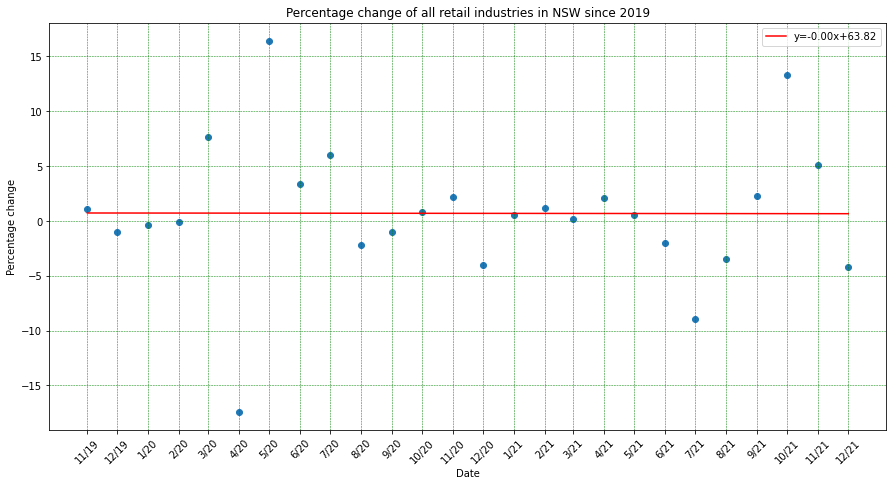

In [33]:
renamed_state_df ['% Change NSW Seasonal'] =  renamed_state_df ['% Change NSW Seasonal'].astype(float)

y_axis = renamed_state_df ['% Change NSW Seasonal']
linereg = st.linregress(x_axis ,y_axis)
print(linereg)
print(" ")
corr = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation of percentage change in NSW of all industries (seasonally adjusted) over time is {corr}")

slope = -8.556327243359663e-05
intercept= 63.81998419514628

line = slope * (renamed_state_df ['date_ordinal']) + intercept

plt.scatter(x_axis, y_axis)
plt.plot(renamed_state_df ['date_ordinal'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel ('Date')
plt.ylabel ('Percentage change')
plt.legend()
plt.xticks(x_axis,strDates,rotation = 45)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Percentage change of all retail industries in NSW since 2019')
plt.savefig('figNSW.png')
plt.show()


LinregressResult(slope=-0.0010808025169701814, intercept=797.971455526965, rvalue=-0.07058961811650387, pvalue=0.7318515826544497, stderr=0.0031175624911919386, intercept_stderr=2299.964571506391)
 
The correlation of percentage change in the NT of all industries (seasonally adjusted) over time is -0.07


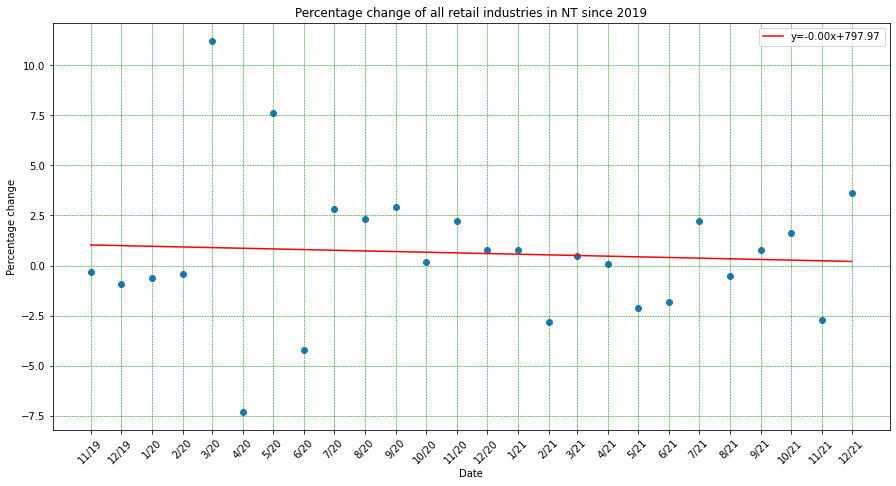

In [34]:
renamed_state_df ['% Change NT Seasonal'] =  renamed_state_df ['% Change NT Seasonal'].astype(float)

y_axis = renamed_state_df ['% Change NT Seasonal']
linereg = st.linregress(x_axis ,y_axis)
print(linereg)
print(" ")
corr = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation of percentage change in the NT of all industries (seasonally adjusted) over time is {corr}")

slope = -0.0010808025169701814
intercept= 797.971455526965

line = slope * (renamed_state_df ['date_ordinal']) + intercept

plt.scatter(x_axis, y_axis)
plt.plot(renamed_state_df ['date_ordinal'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel ('Date')
plt.ylabel ('Percentage change')
plt.xticks(x_axis,strDates,rotation = 45)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Percentage change of all retail industries in NT since 2019')
plt.savefig('figNT.png')
plt.show()


In [35]:
plot_NSW = renamed_state_df ['% Change NSW Seasonal']
plot_VIC = renamed_state_df ['% Change VIC Seasonal']
plot_NT = renamed_state_df ['% Change NT Seasonal']
plot_WA = renamed_state_df ['% Change WA Seasonal']

quartilesNSW = plot_NSW.quantile([.25,.50,.75])
lowerNSW = quartilesNSW[0.25]
upperNSW = quartilesNSW[0.75]
iqrNSW = upperNSW - lowerNSW
lower_boundNSW = lowerNSW - (1.5*iqrNSW)
upper_boundNSW = upperNSW + (1.5*iqrNSW)
print('% Change in NSW for all industries')
print(f"Quartiles: ")
print(quartilesNSW)
print(f"Inter Quartile Range: {iqrNSW}")
print(f"Anything below {lower_boundNSW} could be outliers")
print(f"Anything above {upper_boundNSW} could be outliers")  
print("   ")

quartilesVIC = plot_VIC.quantile([.25,.50,.75])
lowerVIC = quartilesVIC[0.25]
upperVIC = quartilesVIC[0.75]
iqrVIC = upperVIC - lowerVIC
lower_boundVIC = lowerVIC - (1.5*iqrVIC)
upper_boundVIC = upperVIC + (1.5*iqrVIC)
print('% Change in VIC for all industries')
print(f"Quartiles: ")
print(quartilesVIC)
print(f"Inter Quartile Range: {iqrVIC}")
print(f"Anything below {lower_boundVIC} could be outliers")
print(f"Anything above {upper_boundVIC} could be outliers")  
print("   ")

quartilesNT = plot_NT.quantile([.25,.50,.75])
lowerNT = quartilesNT[0.25]
upperNT = quartilesNT[0.75]
iqrNT = upperNT - lowerNT
lower_boundNT = lowerNT - (1.5*iqrNT)
upper_boundNT = upperNT + (1.5*iqrNT)
print('% Change in NT for all industries')
print(f"Quartiles: ")
print(quartilesNT)
print(f"Inter Quartile Range: {iqrNT}")
print(f"Anything below {lower_boundNT} could be outliers")
print(f"Anything above {upper_boundNT} could be outliers")  
print("   ")

quartilesWA = plot_WA.quantile([.25,.50,.75])
lowerWA = quartilesWA[0.25]
upperWA = quartilesWA[0.75]
iqrWA = upperWA - lowerWA
lower_boundWA = lowerWA - (1.5*iqrWA)
upper_boundWA = upperWA + (1.5*iqrWA)
print('% Change in WA for all industries')
print(f"Quartiles: ")
print(quartilesWA)
print(f"Inter Quartile Range: {iqrWA}")
print(f"Anything below {lower_boundWA} could be outliers")
print(f"Anything above {upper_boundWA} could be outliers")  
print("   ")

% Change in NSW for all industries
Quartiles: 
0.25   -1.750
0.50    0.500
0.75    2.275
Name: % Change NSW Seasonal, dtype: float64
Inter Quartile Range: 4.025
Anything below -7.7875000000000005 could be outliers
Anything above 8.3125 could be outliers
   
% Change in VIC for all industries
Quartiles: 
0.25   -2.775
0.50    0.400
0.75    3.375
Name: % Change VIC Seasonal, dtype: float64
Inter Quartile Range: 6.15
Anything below -12.000000000000002 could be outliers
Anything above 12.600000000000001 could be outliers
   
% Change in NT for all industries
Quartiles: 
0.25   -0.825
0.50    0.350
0.75    2.200
Name: % Change NT Seasonal, dtype: float64
Inter Quartile Range: 3.0250000000000004
Anything below -5.362500000000001 could be outliers
Anything above 6.737500000000001 could be outliers
   
% Change in WA for all industries
Quartiles: 
0.25   -1.100
0.50    0.600
0.75    1.775
Name: % Change WA Seasonal, dtype: float64
Inter Quartile Range: 2.875
Anything below -5.4125 could be out

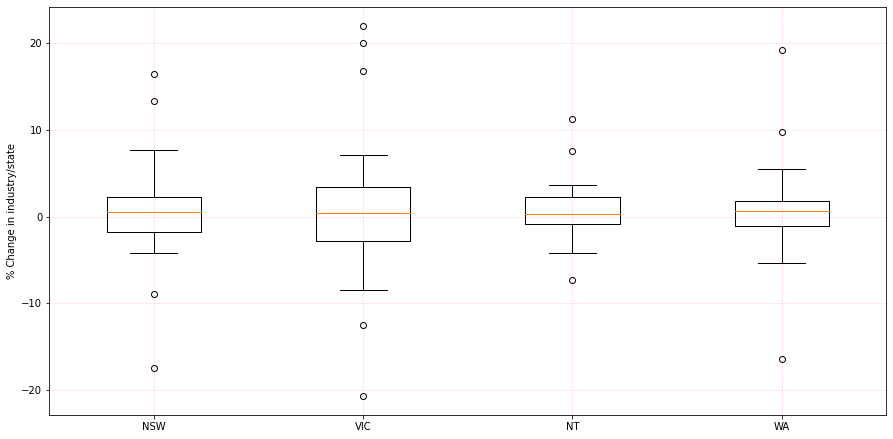

In [36]:
fig1, ax1 = plt.subplots()
ax1.boxplot([plot_NSW, plot_VIC, plot_NT, plot_WA])
ax1.set_ylabel('% Change in industry/state')
ax1.set_xticklabels(["NSW","VIC", 'NT','WA'])

plt.grid(color = 'pink', linestyle = '--', linewidth = 0.5)
plt.savefig("box plot state.png")
plt.show()


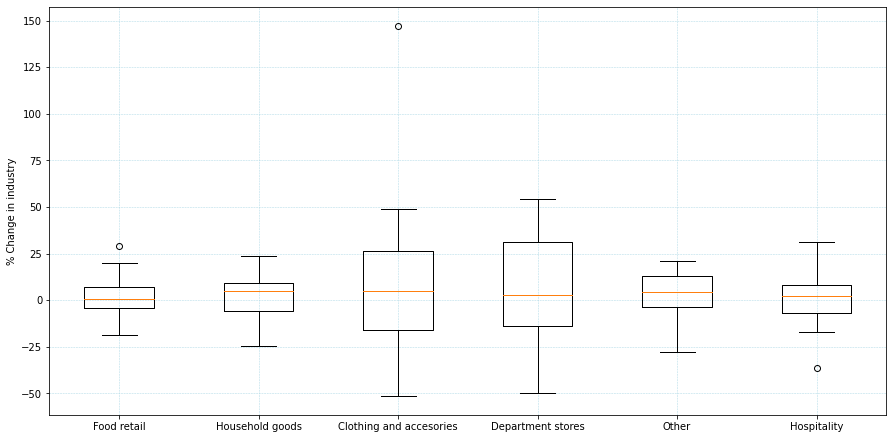

In [37]:
plot_food = renamed_industry_df ['% change Food Retailing']
plot_goods = renamed_industry_df ['% change Household Good Retailing']
plot_clothes = renamed_industry_df['% change Clothing, Footwear and Personal Accessory Retailing']
plot_dep = renamed_industry_df ['% change Department Stores']
plot_other = renamed_industry_df ['% change Other Retailing']
plot_hospo = renamed_industry_df ['% change Cafes, Restaurants and Takeaway']


fig2, ax2 = plt.subplots()
ax2.boxplot([plot_food, plot_goods, plot_clothes, plot_dep, plot_other, plot_hospo])
ax2.set_ylabel('% Change in industry')
ax2.set_xticklabels(["Food retail","Household goods", 'Clothing and accesories','Department stores','Other', 'Hospitality'])

plt.grid(color = 'lightblue', linestyle = '--', linewidth = 0.5)
plt.savefig("box plot industry.png")
plt.show()
